## Beer Style Classification
#### By Daniel Northcutt

### Project Goals:
- The main goal of this project is to determine if beer styles are actually represented by shared traits of a particular style or is it that style classification is more or less arbitrary?
    
- This was accomplished by using data from BreweryDB via JSON files, imputing values and meaning into the dataset, clustering the data to find meaning, and using classification models to accurately predict the style.
    
- The ability to predict beer style by attributes is important to maintain the integrity of tradition, ingredients, and practices for the future of the craft beer industry, which stands as a $100 billion global market.

<hr style="border:1px solid black"> </hr>


### Executive Summary:
- Through classification modeling, style was able to be predicted by over 70% of the time for both a 25 and 49 multi-classification target.  Results performed better than anticipated.
- Clustering and data representation proved challenging due to inconsistency of the data set and a multi target variable.
- IBU, ABV, and SRM proved to be the driving force in creating a baseline of attributes for following the industry style guideline. Imputed characteristics proved to provide stronger model predictors but at the expense of high amounts of false positives



<hr style="border:1px solid black"> </hr>


### Information Going Forward:
   - Standard refernce method (SRM) the method for assesing the color of wort and/or finished beer (0 - 40 scale by darkness)
   - International bitternes unit (IBU) scale of measuring the ppm of isohumulone aka bitterness (0 - 120 scale)
   - Alcohol by volume (ABV) indicates how much of the total volume of the beverage is made up of alcohol
   - Styles subcategories can be seen in 'short_name' column and grouped into 'style_collapsed' column which is the target variable

<hr style="border:1px solid black"> </hr>


### Wrangle:
- Pulled data from JSON files into a dataframe
- Imputed missing values
- Encoded categorical values
- Dropped columns and removed outliers
- Identified charateristics into feature columns
- Condensed beers styles into stronger groupings
- Scale leading features using linear scaler
- Split data into train, validate, test
- If IBU, ABV, and SRM was not extracted the listing was dropped


In [1]:
#IMPORTS

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
import json
import os
import wrangle
import wrangle2
import explore
import model

In [2]:
# Wrangle data as above - please see wrangle.py for further details
train, validate, test = wrangle.wrangle()

In [3]:
#datasets moving forward
train.shape, validate.shape, test.shape

((14578, 44), (6248, 44), (5207, 44))

<hr style="border:1px solid black"> </hr>


## Explore Questions:
  - Does beer style represent particular attributes or is it an arbitrary description
  - How does SRM (color) define a style
  - How does ABV define a style
  - How does IBU (bitterness) define a style

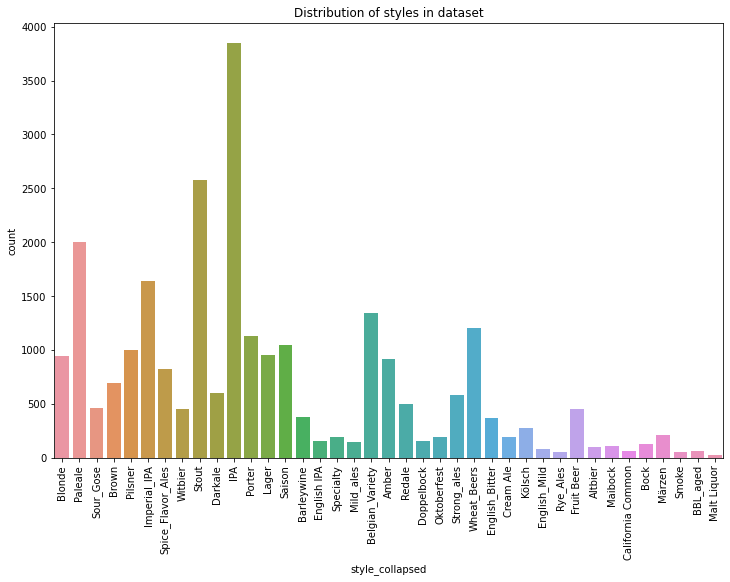

In [4]:
# The multi-classification target is unevenly distributed by style (often by popularity)
# All styles are important for their uniqueness to label as

explore.style_distribution()

### Showing the focus features of SRM, IBU, & ABV to each other by style shows us a lot of noise

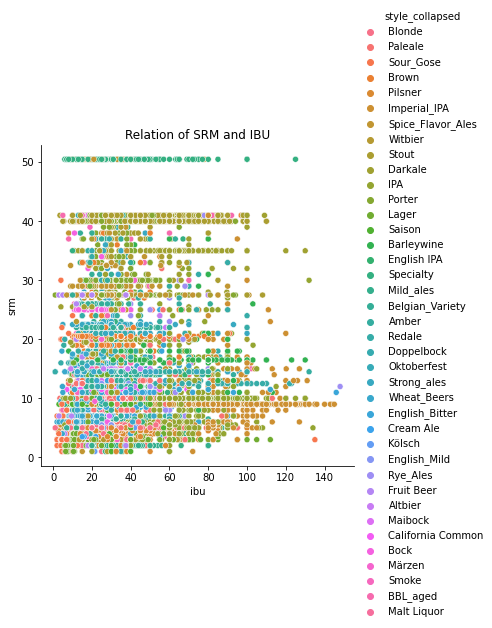

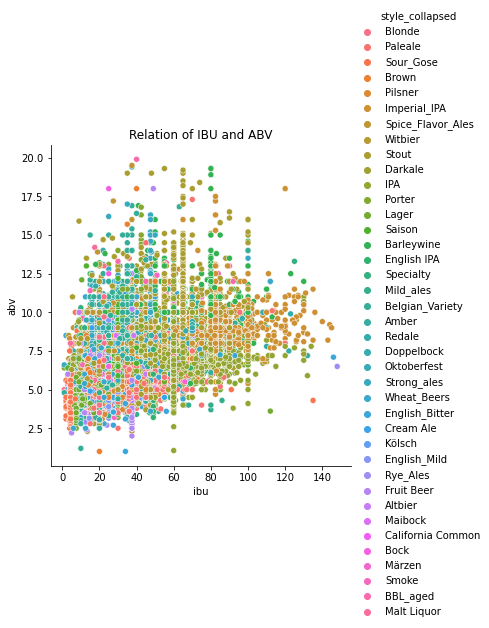

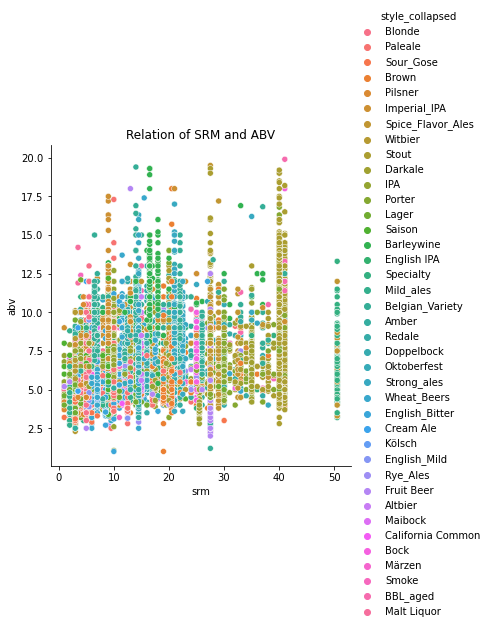

In [5]:
# The relationships of SRM, ABV, & IBU is hard to represent by the quantity of the target variable
explore.relplot1()

### Next, I clustered the data to help give a better understanding of feature relation giving a stronger understanding of attributes through reducing noise.




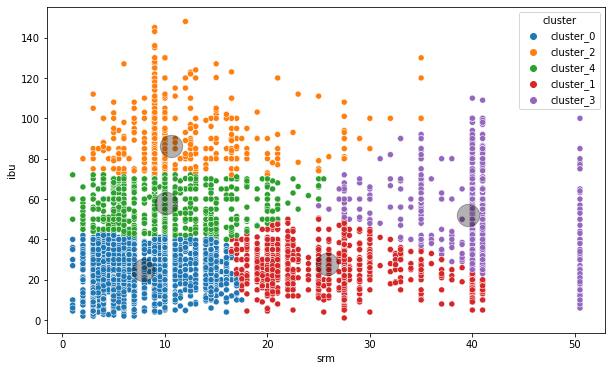

In [6]:
# Here we can see SRM to IBU:
# We can see some strong groupings giving groupings to broader classification
explore.ibu_srm_cluster()

# cluster 0 - light color/low bitterness - pilsner, lager, kolsch
# cluster 1 - wide range color/low bitterness - porter, dark ale
# cluster 2 - light color/ high bitterness - ipa, imperial_ipa
# cluster 3 - high color/ varying bitterness - stouts
# cluster 4 - low-medium color/ medium bitterness - pale_ale, english milds, wheat beers


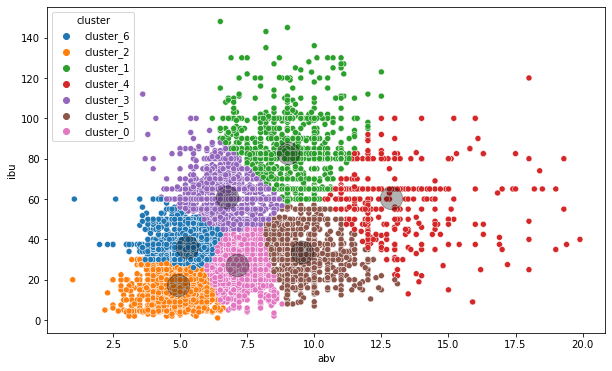

In [7]:
# Comparing IBU to ABV
# We can see a clear trend that higher IBU tends to increase in ABV
explore.ibu_abv_cluster()

# cluster 0 - 7 ABV / 30 IBU - bocks, amber
# cluster 1 - 9 ABV / 90 IBU - ipas
# cluster 2 - 5 ABV / 35 IBU - lagers, milds, pilsner
# cluster 3 - 6 ABV / 65 IBU - pale ales, englist bitters, browns
# cluster 4 - 12.5 ABV / 60 IBU - stouts, bbl beers
# cluster 5 - 10 abv / 30 ibu - Belgian beers
# cluster 6 - 5 abv / 40 ibu - blondes, amberss

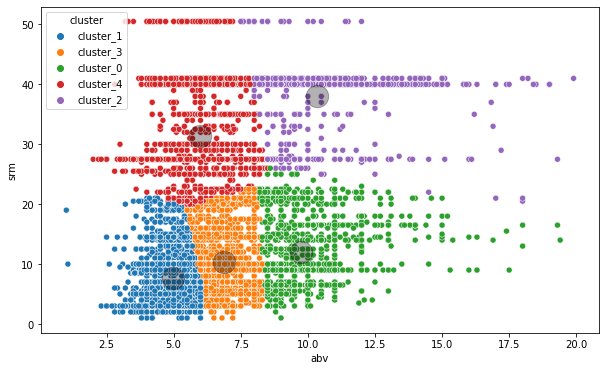

In [8]:
# Comparing SRM to ABV
# There is strong groupings shown
explore.srm_abv_cluster()

# cluster 0 - 10 srm / 10 abv - ipas
# cluster 1 - 8 srm / 5 abv - lagers, pilsner
# cluster 2 - 38 srm / 10 abv - stouts, bbl_aged 
# cluster 3 - 10 srm / 6.5 abv - pale, english bitters
# cluster 4 - 30 srm / 6 abv - porters, dark ales, browns

## Statistical Tests
- Three chi^2 tests to support the relation between IBU, ABV, and SRM to the style classification
- Alpha = 0.05 (further details of tests can be seen at explore.py)

In [9]:
explore.chi_ibu()

chi^2 = 133520.0502
p     = 0.0000

 Our p value is less than our alpha and we can reject the null hypothesis
    There is a relationship between IBU and style classification.


In [10]:
explore.chi_abv()

chi^2 = 35522.8048
p     = 0.0000

 Our p value is less than our alpha and we can reject the null hypothesis
    There is a relationship between ABV and style classification.


In [11]:
explore.chi_srm()

chi^2 = 194040.9880
p     = 0.0000

 Our p value is less than our alpha and we can reject the null hypothesis
    There is a relationship between SRM and style classification.


## Explore Takeaways:
- Distribution is skewed to a few big styles, but all must be represented for the uniqueness. 
- Clustering the data shows greater understanding of groupings, giving broader classification which can be used for style classification
- Through visual representation and statistical testing proved that IBU, SRM, and ABV are the focus features moving forward in predicting a beer's style
- Trends can be seen by greater feature relationship but the dataset has so many varying features that it is hard to give deep meaning without a greater understanding of style characteristics

<hr style="border:1px solid black"> </hr>


## Modeling
- Various modeling was tested but Random Forest proved to be the best fit for this dataset

- Baseline was established as the sum of the top 12 styles - 71.4%

- Boolean imputed features modeled tested high but proved to offer a great deal of false positives (low precision)

- Testing was performed on a scaled target feature of 25 and 49

- All Random Forest was performed with a 1-12 depth to maintain continuity

In [12]:
## Test 1: Imputed boolean characteristic features on a 25 multi-classification target

Features = ['sour', 'fruit_des',
    'wheat_des', 'smoke_des', 'chili_des', 'mead_des', 'lager_des', 'BBL',
    'american_hop', 'piney_flavor', 'belgian', 'imperial', 'honey',
    'esters', 'bitterness', 'oak', 'scaled_ibu',
    'scaled_srm', 'scaled_abv']
model.feature_forest()


training score: 90.25%

validate score: 86.38%

The baseline accuracy is: 71.40%

The precision is: 32.14%
The recall is: 100.00%


In [13]:
## Test 2: IBU, ABV, SRM scaled on a 25 multi-classification target
Features = ['scaled_ibu', 'scaled_srm', 'scaled_abv']

model.target_forest()

training score: 87.28%

validate score: 76.70%

The baseline accuracy is: 71.40%

The precision is: 92.59%
The recall is: 100.00%


In [14]:
## Test 3: IBU, ABV, SRM on a 49 multi-classification target

Features = ['ibu','srm', 'abv']

model.target_forest_extra_target_variable()

training score: 87.41%

validate score: 76.87%

The baseline accuracy is: 71.40%

The precision is: 96.08%
The recall is: 100.00%


In [15]:
## Test 4: All imputed features, IBU, SRM, ABV on a 49 multi-classification target

Features = ['ibu','srm', 'abv', 'sour', 'fruit_des',
        'wheat_des', 'smoke_des', 'chili_des', 'mead_des', 'lager_des', 'BBL',
        'american_hop', 'piney_flavor', 'belgian', 'imperial', 'honey',
        'esters', 'bitterness', 'oak']

model.all_features()

training score: 90.11%

validate score: 85.67%

The baseline accuracy is: 71.40%

The precision is: 29.31%
The recall is: 100.00%


### Takeaways:
- All Random Forest models performed better than the baseline with model 3 being the strongest

- My assumption of having a higher multi-classification target would cause for more false positives proved to be incorrect.  The 25 and 49 classification target
    

<hr style="border:1px solid black"> </hr>


## The Test:
- Running the unseen testing dataset on the best performing training set - model 3

In [16]:
### Test set on 49 multi-classification target
Features = ['ibu','srm', 'abv']

model.test_time()

The baseline accuracy is: 71.40%


The test score is: 76.46%



### The final test performed at:
    training score: 87.41%
    validate score: 76.87%
    The test score is: 76.46%
    
This test was choosen because other models offered a greater deal of false positives to achieve a higher score.  This test offered the best balance and proved to correctly predict the style 3/4 of the time for a target variable of 49 values.




<hr style="border:1px solid black"> </hr>


### Conclusion
- Predicting style by class is extremely difficult due to the parameters not being cut and dry answer but rather by an attribute range.  
- Multi-classification is extremely difficult to implement lots of target variables without also increasing false postives.
- The random forest model of IBU, ABV, and SRM did beat baseline proving to offer weight in implementation, predicting over 75%.


<hr style="border:1px solid black"> </hr>


### Recommendations/Next Steps
- Please clone this entire repo and view the readme for steps in reproducing this notebook or findings in other notebooks.
- Moving forward, it would be interesting to test this model on another dataset to test the accuracy.  
- Having a richer dataset with one giving specific ingredients of specific ingredients like hops, malt, and yeast used could provide greater depth in understanding classification. It would be interesting to plot ingredients to what styles they are mostly associated with.
- This project faces the battle between style & tradition vs popularity in the market.  Both hold weight but often the brewers can label something incorrectly to it's attributes for sales.